<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DL/%D0%A2%D0%B5%D0%BC%D0%B0_1_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Тема 1. Введение в нейронные сети
##1. От регрессии к нейросети

Рассмотрим переход от линейной регрессии к нейронным сетям.





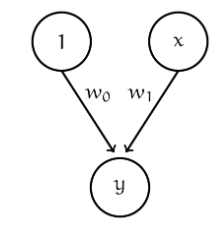

 Представим, что наблюдается графическое представление линейной регрессии, выраженной уравнением:  
$$y = w_0 + w_1 \cdot x.$$
Это стандартная формула, где $y$ зависит линейно от $x$. Теперь возникает вопрос: как можно модифицировать эту модель, чтобы сделать зависимость нелинейной?


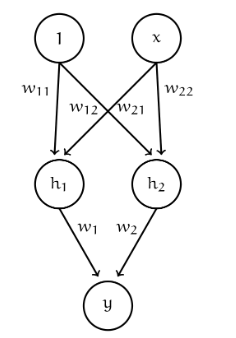


Для иллюстрации введём промежуточные вычисления через скрытые слои. Пусть скрытый слой представлен двумя нейронами, а их выходы обозначены как $h_1$ и $h_2$. Эти величины рассчитываются следующим образом:  
$$h_1 = w_{11} \cdot 1 + w_{21} \cdot x,$$
$$h_2 = w_{12} \cdot 1 + w_{22} \cdot x.$$
Итоговое значение $y$ вычисляется с использованием этих промежуточных величин:  
$$y = w_1 \cdot h_1 + w_2 \cdot h_2.$$

Подставляя выражения для $h_1$ и $h_2$, получаем:  
$$y = w_1 \cdot (w_{11} + w_{21} \cdot x) + w_2 \cdot (w_{12} + w_{22} \cdot x).$$
Раскрывая скобки:  
$$y = (w_1 w_{11} + w_2 w_{12}) + (w_1 w_{21} + w_2 w_{22}) \cdot x.$$

Таким образом, это уравнение всё ещё представляет собой линейную зависимость, несмотря на введение скрытого слоя. Чтобы сделать модель нелинейной, необходимо применить к промежуточным величинам $h_i$ нелинейную функцию. Например, можно использовать сигмоиду:  
$$f(h) = \frac{1}{1 + e^{-h}}.$$

Тогда итоговая формула будет выглядеть так:  
$$y = w_1 \cdot f(w_{11} + w_{21} \cdot x) + w_2 \cdot f(w_{12} + w_{22} \cdot x).$$

Применение функции активации устраняет линейность. Таким образом, преобразование линейной регрессии в нейронную сеть достигается за счёт добавления скрытого слоя и применения к его выходам функции активации.

Для функций активации могут использоваться разные варианты. Одной из популярных в современных нейронных сетях является ReLU (Rectified Linear Unit):  
$$\text{ReLU}(h) = \max(0, h).$$

Эта функция нелинейна и вычисляется просто. Кроме того, она обладает рядом полезных свойств, которые будут подробно рассмотрены в дальнейших материалах.



##2. От картинки к формуле

Рассмотрим процесс прогнозирования заполняемости кофейни с использованием нейронной сети. Модель принимает три входных параметра: температуру за окном ($x_1$), факт наличия митинга на улице ($x_2$) и пол бариста ($x_3$), где мужчина обозначается как $0$, а женщина как $1$. В качестве функции активации используется ReLU (Rectified Linear Unit):  
$$\text{ReLU}(h) = \max(0, h).$$



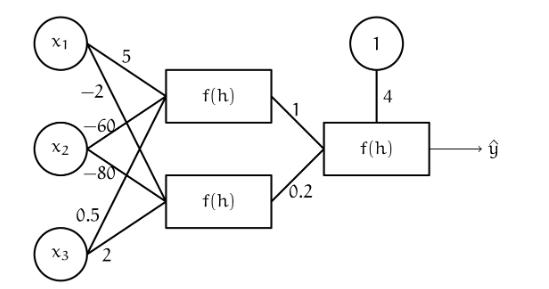


#### Пример прогноза

Для заданных условий:  
- $x_1 = 20$ (температура 20 градусов),  
- $x_2 = 0$ (митинга нет),  
- $x_3 = 1$ (за стойкой стоит женщина),  

выполним поэтапные вычисления для каждого слоя нейронной сети.  





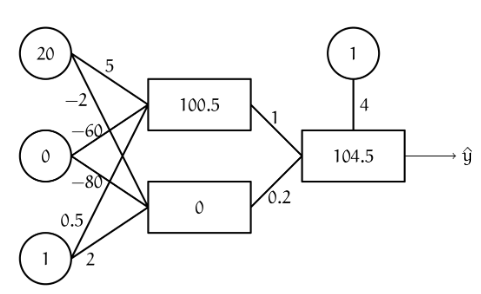


1. **Вычисление значений скрытого слоя**  
   Для первого нейрона:  
   $$
   h_1 = \text{ReLU}(5 \cdot x_1 + (-60) \cdot x_2 + 0.5 \cdot x_3) = \text{ReLU}(5 \cdot 20 + (-60) \cdot 0 + 0.5 \cdot 1) = \text{ReLU}(100.5) = 100.5.
  $$
   Для второго нейрона:  
   $$
   h_2 = \text{ReLU}(-2 \cdot x_1 + (-80) \cdot x_2 + 2 \cdot x_3) = \text{ReLU}(-2 \cdot 20 + (-80) \cdot 0 + 2 \cdot 1) = \text{ReLU}(-38) = 0.
  $$

2. **Выходной слой**  
   Итоговое значение прогнозируется по формуле:  
   $$
   \hat{y} = \text{ReLU}(1 \cdot h_1 + 0.2 \cdot h_2 + 4 \cdot 1).
  $$
   Подставляя значения $h_1$ и $h_2$:  
   $$
   \hat{y} = \text{ReLU}(1 \cdot 100.5 + 0.2 \cdot 0 + 4 \cdot 1) = \text{ReLU}(104.5) = 104.5.
  $$

Таким образом, прогнозируемое число посетителей в кофейне составляет $104.5$.  





#### Нейросеть как функция

Нейронная сеть, по сути, представляет собой нелинейную функцию, которую можно записать аналитически. Построим её пошагово, начиная с выходного слоя:  
$$
\hat{y} = f(1 \cdot h_1 + 0.2 \cdot h_2 + 4 \cdot 1),
$$  
где $f(h) = \text{ReLU}(h)$. Подставим выражения для скрытых слоёв $h_1$ и $h_2$:  
$$
\hat{y} = f(f(5x_1 - 60x_2 + 0.5x_3) + 0.2 \cdot f(-2x_1 - 80x_2 + 2x_3) + 4).
$$  
Развёрнутая формула описывает работу нейронной сети. Обучение сети эквивалентно подбору параметров (весов) этой нелинейной функции для достижения максимальной точности предсказания.  



Таким образом, модель нейросети — это способ обобщения данных в виде композиции линейных операций и функций активации, которые формируют сложную нелинейную зависимость между входными и выходными параметрами.











##3. Из формулы в картинку

Рассмотрим функцию:  
$$
y = \max(0, 4 \cdot \max(0, 3 \cdot x_1 + 4 \cdot x_2 + 1) + 2 \cdot \max(0, 3 \cdot x_1 + 2 \cdot x_2 + 7) + 6).
$$  
Эта функция описывает процесс вычислений в нейронной сети. Переведём её в графическое представление нейросети, начиная с выходного слоя.  



#### Выходной слой  
Итоговый выход нейронной сети представлен как:  
$$
\hat{y} = \text{ReLU}(4 \cdot h_1 + 2 \cdot h_2 + 6),
$$  
где $h_1$ и $h_2$ — выходы скрытых нейронов первого слоя. Функция активации $\text{ReLU}(h)$ равна:  
$$
\text{ReLU}(h) = \max(0, h).
$$  



#### Скрытый слой  
Каждый из нейронов первого слоя также вычисляет комбинацию входных значений $x_1$ и $x_2$, используя линейное преобразование с последующим применением функции активации ReLU.  

1. Для первого нейрона:  
$$
h_1 = \text{ReLU}(0.3 \cdot x_1 + 4 \cdot x_2 + 1).
$$  

2. Для второго нейрона:  
$$
h_2 = \text{ReLU}(0.3 \cdot x_1 + 2 \cdot x_2 + 7).
$$  



#### Архитектура нейросети  
На основе полученных выражений можно выделить следующие уровни:  
1. **Входной слой**: принимает значения $x_1$ и $x_2$.  
2. **Первый скрытый слой**: содержит два нейрона, которые вычисляют значения $h_1$ и $h_2$.  
3. **Выходной слой**: объединяет результаты $h_1$ и $h_2$ с помощью линейной комбинации и функции активации ReLU.  



Таким образом, нейронная сеть имеет следующую структуру:  
- Два входа ($x_1$, $x_2$).  
- Два нейрона на первом скрытом слое, каждый из которых выполняет линейное преобразование и применяет ReLU.  
- Один нейрон на выходном слое, который использует результаты первого слоя для вычисления итогового значения.  


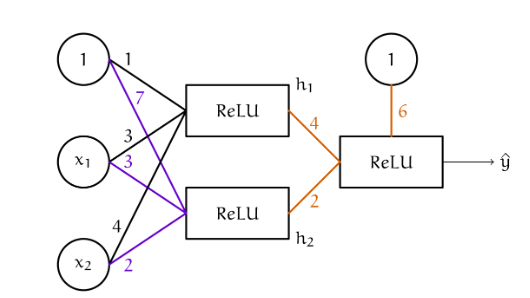


Эта архитектура может быть визуализирована в виде сети с входным слоем, двумя скрытыми нейронами и одним выходным.












##4. Армия регрессий

Рассмотрим последовательность задач, связанных с использованием персептронов для решения различных логических и классификационных задач. Каждая задача иллюстрирует принципы настройки весов и активационных функций в простых нейронных сетях.





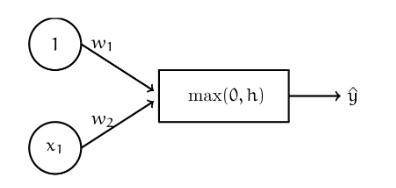

#### Часть (а): Реализация логического отрицания

Для реализации функции логического отрицания ($x_1 = 0 \rightarrow y = 1$, $x_1 = 1 \rightarrow y = 0$) используем следующий персептрон:  
$$
\hat{y} = \max(0, w_1 + w_2 \cdot x_1).
$$  

Условия для работы персептрона:  
$$
\max(0, w_1 + w_2 \cdot 1) = 0, \quad \max(0, w_1 + w_2 \cdot 0) = 1.
$$  

Из второго уравнения видно, что $w_2$ не влияет на результат при $x_1 = 0$, а $w_1 = 1$. Чтобы обеспечить выполнение первого уравнения, выбираем $w_2 \leq -1$. Таким образом, один из возможных наборов параметров — $w_1 = 1, w_2 = -1$.  





#### Часть (б): Обучение персептрона на нескольких примерах

Для реализации персептрона, который обрабатывает три входа ($x_1, x_2, x_3$) и выдает значения $y$, воспользуемся таблицей:  

| $x_1$ | $x_2$ | $x_3$ | $y$  |  
|--|--|--|-|  
| 1      | 1      | 2      | 0.5   |  
| 1      | -1     | 1      | 0     |  




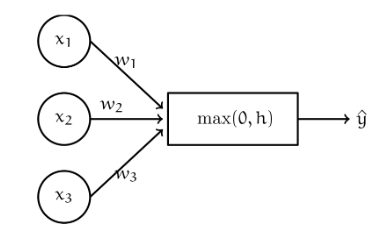


Функция активации представлена в виде:  
$$
\hat{y} = \max(0, w_1 + w_2 \cdot x_2 + w_3 \cdot x_3).
$$  

Для каждого из примеров составим уравнения:  
1. $\max(0, w_1 + w_2 + 2 \cdot w_3) = 0.5,$  
2. $\max(0, w_1 - w_2 + w_3) = 0.$  

Одно из возможных решений заключается в выборе $w_1 = 0$, $w_3 = 0$, $w_2 = 0.5$. Тогда оба уравнения выполняются: первое выдает 0.5, а второе переходит в отрицательную область, что приводит к $\hat{y} = 0$ из-за функции ReLU.



#### Часть (в): Классификация точек на плоскости




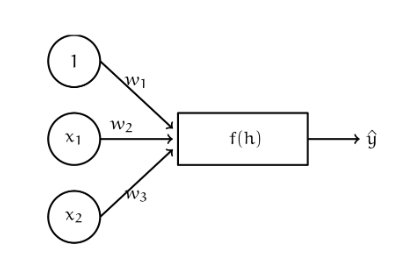

Дано два линейных разделителя на плоскости:  
$$
x_1 + x_2 = 1, \quad x_1 - x_2 = 1.
$$  
Необходимо построить нейронную сеть, которая будет классифицировать точки согласно заданным классам. В качестве функции активации используется функция Хевисайда ($f(h) = 1$, если $h > 0$; $f(h) = 0$, если $h \leq 0$).

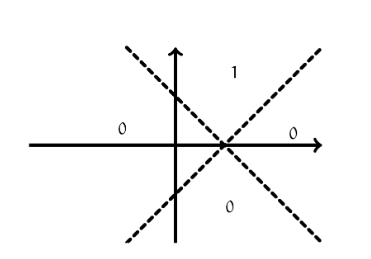


## Нейрон как Линейная Разделяющая Поверхность

Один нейрон можно представить как линию, проведенную на плоскости, которая отделяет один класс данных от другого. Например, уравнение линии вида $x_1 + x_2 - 1 = 0$ может быть описано с помощью нейрона.



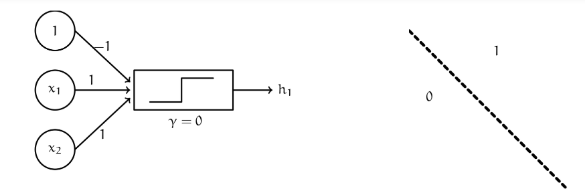


- Для первой линии ($x_1 + x_2 = 1$):  
  $$
  h_1 = f(w_1 \cdot x_1 + w_2 \cdot x_2 - \gamma), \quad w_1 = 1, w_2 = 1, \gamma = 1.
 $$



Порог $\gamma$ для кусочной функции в определенном смысле дублирует константу. Эти два параметра взаимосвязаны, и в нашем анализе мы будем всегда считать его равным нулю. Если комбинация $x_1$, $x_2$ и 1 оказывается больше нуля, это указывает на то, что мы находимся справа от прямой. В случае необходимости поменять метки 0 и 1 местами, достаточно умножить все коэффициенты на -1.



Персептрон способен определить, по какую сторону от прямой мы находимся, задавая таким образом одну линейную разделяющую поверхность. Аналогично, для второй прямой мы можем получить следующий нейрон.


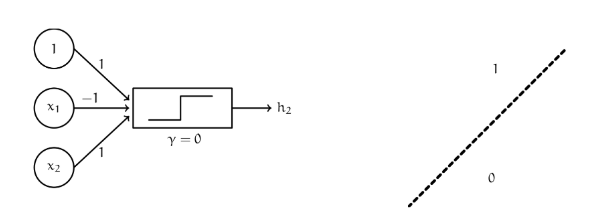


Таким образом, первый персептрон определяет позицию относительно первой прямой, а второй — относительно второй. Далее необходимо объединить полученные результаты. Нейрон для логической операции «И» должен реализовать соответствующую логическую функцию, которую задает таблица истинности (см. рисунок ниже). В этой таблице также приведены примеры весов, которые могли бы объединить выходные данные первого слоя в итоговый прогноз.


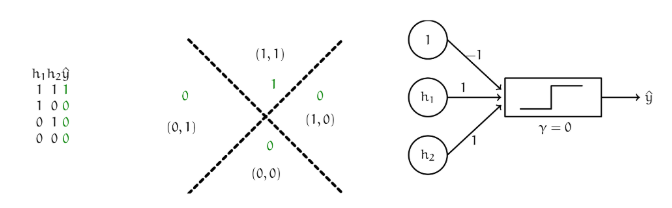

- Для второй линии ($x_1 - x_2 = 1$):  
  $$
  h_2 = f(w_1 \cdot x_1 + w_2 \cdot x_2 - \gamma), \quad w_1 = 1, w_2 = -1, \gamma = 1.
 $$



Теперь мы можем визуализировать итоговую нейронную сеть, решающую задачу классификации. Она состоит из двух слоев, так как каждый персептрон строит только одну разделяющую линию.

Если бы мы ввели дополнительный признак $x_1 \cdot x_2$, то смогли бы обойтись всего одним персептроном. В нашем случае нейронная сеть самостоятельно создала на первом слое признак, которого ей не хватало для решения задачи. Иными словами, первый слой нейронной сети преобразовал сложное пространство признаков в более простое, а затем второй слой решил задачу классификации в этом упрощенном пространстве.


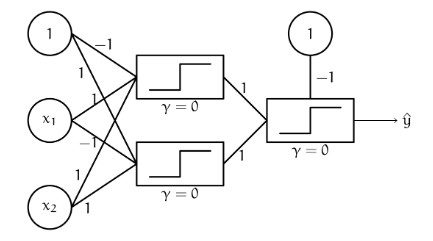


Таким образом, мы рассмотрели основные принципы работы нейронов и персептронов, а также их применение в нейронных сетях для решения задач классификации. В дальнейшем мы будем углубляться в изучение более сложных архитектур и алгоритмов, которые позволяют эффективно решать разнообразные задачи в области машинного обучения.























#### Дополнительное замечание

Если ввести дополнительный признак $z = x_1 \cdot x_2$, можно обойтись одним персептроном, который будет описывать задачу классификации с помощью одной функции активации. Такой персептрон может быть задан уравнением:  
$$
\hat{y} = f(w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot z - \gamma),
$$  
где $z = x_1 \cdot x_2$, а $f(h)$ — активационная функция (например, функция Хевисайда).

Этот подход позволяет напрямую учитывать нелинейные взаимодействия между $x_1$ и $x_2$, которые не могли быть представлены в линейном виде. Таким образом, обучение включает настройку весов $w_1, w_2, w_3$ и порога $\gamma$ для получения правильной классификации.  

Если же дополнительный признак не вводить, то нейросеть решает задачу в два этапа:
1. На первом слое преобразует исходное пространство ($x_1, x_2$) в более сложное представление, добавляя скрытые признаки.  
2. На втором слое производит финальную классификацию с учётом нового представления признаков.  

Это демонстрирует способность нейронных сетей самостоятельно создавать необходимые признаки для эффективного решения задачи.








##5. Логические функции и их реализация нейронными сетями

#### Постановка задачи
Рассматриваются логические функции, заданные таблицами истинности, где два входных столбца ($x_1$ и $x_2$) приводят к одному выходному ($y$).

### Основные логические операции

Логические функции могут быть заданы через таблицы истинности. Рассмотрим три основные операции:

1. **Логическое «И» (AND)**: Эта операция возвращает истину (1) только тогда, когда оба входа истинны.
2. **Логическое «ИЛИ» (OR)**: Эта операция возвращает истину, если хотя бы один из входов истинен.
3. **Исключающее ИЛИ (XOR)**: Эта операция возвращает истину, когда входы различны, то есть один из входов истинен, а другой — ложен.

### Таблицы истинности

Для наглядности представим таблицы истинности для каждой из операций:

| Вход 1 (x1) | Вход 2 (x2) | AND (x1 ∧ x2) | OR (x1 ∨ x2) | XOR (x1 ⊕ x2) |
|-------------|-------------|---------------|--------------|----------------|
| 0           | 0           | 0             | 0            | 0              |
| 0           | 1           | 0             | 1            | 1              |
| 1           | 0           | 0             | 1            | 1              |
| 1           | 1           | 1             | 1            | 0              |



Операция XOR эквивалентна утверждению $x_1 \neq x_2$, которое можно выразить с использованием индикатора (скобки Айверсона):  

$$
[x_1 \neq x_2] =
\begin{cases}
1, & \text{если } x_1 \neq x_2, \\
0, & \text{если } x_1 = x_2.
\end{cases}
$$

Скобка Айверсона позволяет выразить любую булевую функцию через аналитическое выражение. Например, единичная ступенька (функция Хевисайда $f(h)$) может быть записана как:

$$
f(h) = [h > 0].
$$

В предыдущем упражнении мы уже построили нейрон для пересечения. Он располагался на последнем слое нейросети. Посмотрим на тот же нейрон под другим углом.




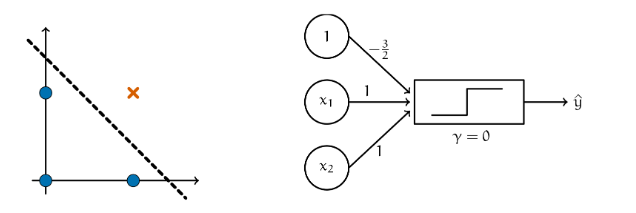

**1. Логическое "И" (AND):**  
Для логического пересечения $AND$ необходимо отделить точку $(1,1)$ от остальных на плоскости. Это можно сделать с помощью прямой, например, $x_2 = 1.5 - x_1$. Пропустив точки через функцию:

$$
y = [w_1 x_1 + w_2 x_2 - \gamma > 0],
$$

проверяем её корректность:  
$$
\begin{aligned}
&[1 \cdot 1 + 1 \cdot 1 - 1.5 > 0] = [0.5 > 0] = 1, \\
&[1 \cdot 0 + 1 \cdot 0 - 1.5 > 0] = [-1.5 > 0] = 0, \\
&[1 \cdot 0 + 1 \cdot 1 - 1.5 > 0] = [-0.5 > 0] = 0, \\
&[1 \cdot 1 + 1 \cdot 0 - 1.5 > 0] = [-0.5 > 0] = 0.
\end{aligned}
$$

Это подтверждает, что пересечение реализовано корректно.

**2. Логическое "ИЛИ" (OR):**  
Для объединения $OR$ линия на плоскости должна отделить точку $(0,0)$ от остальных. Пример подходящей линии: $x_2 = 0.5 - x_1$. Пропуск точек через функцию аналогичен, с проверкой, что результат соответствует таблице истинности "ИЛИ".




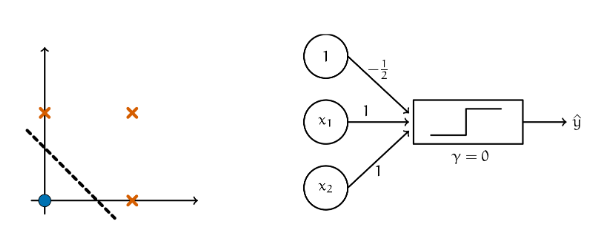



**3. Исключающее "ИЛИ" (XOR):**  
Для разделения точек, принадлежащих XOR, требуется две линии. Например, одна линия может разделять $(0,0)$ и $(1,1)$, другая — $(0,1)$ и $(1,0)$. Таким образом, первый слой нейросети определяет позицию относительно каждой из линий, а второй слой объединяет эти результаты.  


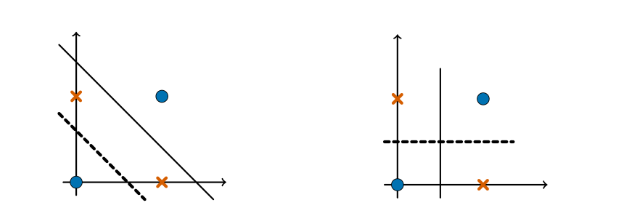


Функция XOR может быть записана через пересечение ($\cap$) и объединение ($\cup$) как:  
$$
\hat{y} = [1 \cdot (x_1 \cup x_2) - 1 \cdot (x_1 \cap x_2) - 0.5 > 0].
$$

Здесь:  
- $x_1 \cup x_2$ — нейрон, определяющий принадлежность к области выше линии для объединения.  
- $x_1 \cap x_2$ — нейрон, отвечающий за пересечение точек.  

#### Итоговая структура нейросети для XOR
Для реализации XOR требуется двухслойная нейросеть:  
1. **Первый слой:** определяет позиции относительно линий, соответствующих $(x_1 \cup x_2)$ и $(x_1 \cap x_2)$.  
2. **Второй слой:** объединяет эти результаты, реализуя логику XOR.  

Важно отметить, что без дополнительного признака (например, $z = x_1 \cdot x_2$) минимальная архитектура сети состоит из двух слоёв. Если такой признак вводится, задачу можно решить с помощью одного персептрона.











##6. Реализация XOR с использованием дополнительного признака

#### Постановка задачи
Для реализации операции "исключающее ИЛИ" (XOR) стандартными методами требуется несколько персептронов, что связано с невозможностью разделить области, соответствующие разным выходным значениям, одной линейной границей. Это объясняется отсутствием признаков, позволяющих эффективно разделить точки.

#### Добавление нового признака
Для упрощения задачи предлагается вручную добавить новый признак $x_3 = x_1 \cdot x_2$. Это позволяет нейросети использовать дополнительную информацию о взаимодействии входных переменных и реализовать XOR с помощью одного персептрона.

Формула для выходного значения:
$$
\hat{y} = [x_1 + x_2 - 2 \cdot x_1 \cdot x_2 - 0.5 > 0].
$$
Такая линия как раз будет задавать две скрещивающиеся прямые.


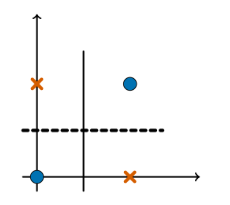


#### Геометрическая интерпретация
Линия, задаваемая формулой:
$$
x_1 + x_2 - 2 \cdot x_1 \cdot x_2 - 0.5 = 0,
$$
описывает пересечение двух прямых. Преобразуем уравнение для более наглядного вида:

1. Умножим уравнение на 2:
   $$
   2x_1 + 2x_2 - 4x_1x_2 - 1 = 0.
   $$

2. Группируем переменные:
   $$
   2x_1(1 - 2x_2) + 2x_2 - 1 = 0.
   $$

3. Разделяем выражение на множители:
   $$
   (1 - 2x_2)(2x_1 - 1) = 0.
   $$

Из этого уравнения получаем две прямые:
- $x_2 = 0.5$,
- $x_1 = 0.5$.

#### Интерпретация результата
Добавление признака $x_3 = x_1 \cdot x_2$ позволило задать границы, необходимые для разделения точек, с помощью одной линии, описанной двумя прямыми $x_1 = 0.5$ и $x_2 = 0.5$. Это демонстрирует, что включение нелинейного признака может существенно упростить задачу, минимизируя архитектуру нейросети.

#### Вывод
Добавление нового признака на этапе входных данных помогает обойти ограничение линейности одного персептрона, выполняя часть работы нейросети вручную. Этот подход иллюстрирует принцип построения глубокой архитектуры: первые слои создают сложные признаки, на основе которых последующие слои решают задачу классификации или регрессии.












##7. Минимальное количество нейронов для решения задач классификации

#### Постановка проблемы
Рассмотрим четыре задачи классификации, каждая из которых имеет свою геометрическую интерпретацию. Цель — определить минимальное количество нейронов, необходимое для их решения с использованием многослойной нейронной сети.



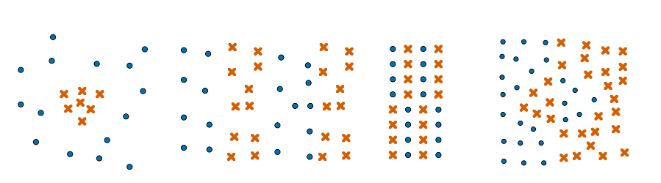



#### Задача 1: Классификация внутри треугольника
Необходимо выделить область внутри треугольника. Внутренние точки относятся к классу 1, а внешние — к классу 0.

**Решение:**
1. Первый слой сети строит три прямые линии, ограничивающие треугольник. Каждую линию описывает отдельный нейрон.
2. Если точка находится внутри треугольника, все три нейрона выдают 1.
3. На втором слое используется один нейрон, который проверяет, что все три значения равны 1, выдавая 1 для точки внутри треугольника и 0 — для остальных.

**Итог:** Всего 4 нейрона — три на первом слое и один на втором.



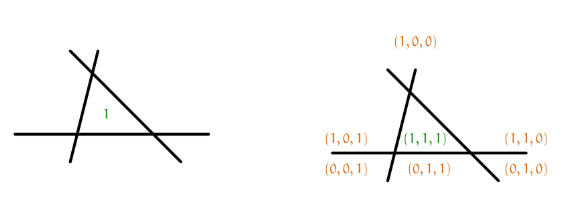



#### Задача 2: Определение положения относительно полос
Необходимо построить три полосы, каждая из которых задаётся двумя линиями. Решение зависит от того, в какой из полос находится точка.


Первый слой должен построить нам три линии. Это три нейрона. Второй слой должен принять решение в какой из полос мы оказались. Будем считать, что если мы попали направо, нейрон выдаёт единицу. Если мы попали налево, ноль. В качестве функции активации используем единичную ступеньку.


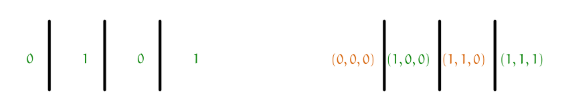

Вопрос в том, хватит ли нам на втором слое одного нейрона для того, чтобы обработать все четыре возможные ситуации. Нам нужно, чтобы выполнялись следующие условия:
   $$
   \begin{cases}
   f(w_1 \cdot 1 + w_2 \cdot 1 + w_3 \cdot 1) = 1, \\
   f(w_1 \cdot 1 + w_2 \cdot 0 + w_3 \cdot 0) = 1, \\
   f(w_1 \cdot 1 + w_2 \cdot 1 + w_3 \cdot 0) = 0, \\
   f(w_1 \cdot 0 + w_2 \cdot 0 + w_3 \cdot 0) = 0.
   \end{cases}
   $$

Для выполнения условий можно выбрать веса, например: $w_1 = 1$, $w_2 = -2$, $w_3 = 4$.

**Итог:** Всего 4 нейрона — три на первом слое и один на втором.





#### Задача 3: Две задачи XOR, расположенные рядом
3) Оценим число нейронов сверху. Перед нами две XoR задачи, которые лежат рядом с друг-другом. Для решения каждой надо 3 нейрона. Чтобы объединить получившиеся решения нужен ещё один нейрон. Получается трёхслойная сетка с 7 нейронами.
Если мы попробуем подойти к задаче также, как в предыдущем пункте, на втором слое мы получим несовместимую систему из уравнений. То есть третьего слоя точно не избежать.
Можно первым слоем построить 3 линии, вторым решить задачу из предыдущего пункта, а на третьем добавить информацию о том, выше горизонтальной линии мы оказались или ниже. Тогда мы потратим 6 нейронов. Нейросетка получится неполносвязной.




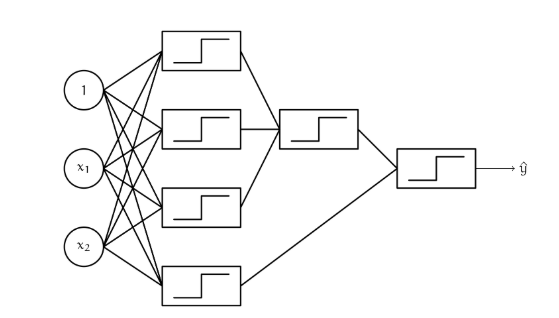


**Итог:**
- Минимальное число нейронов: 6 (неполносвязная сеть).
- Полносвязная сеть потребует 7 нейронов.



#### Выводы
Оптимизация числа нейронов зависит от постановки задачи и свойств сети:
1. В задаче классификации внутри треугольника потребовалось 4 нейрона.
2. Для полос — также 4 нейрона.
3. Для двух XOR задач минимально возможно 6 нейронов.

Каждая задача иллюстрирует, как геометрическое представление помогает определить минимальную архитектуру сети. Решение сложных задач требует учёта всех возможных взаимодействий между признаками, что может потребовать дополнительных слоёв и нейронов.










##8. Универсальный регрессор и классификатор: использование нейронных сетей

#### Постановка задачи
Задача состоит в том, чтобы доказать возможность аппроксимации любой непрерывной функции $f(x)$ на заданном интервале с помощью нейронной сети с произвольной точностью. Для этого предлагается использовать кусочно-линейные функции, представляемые в виде ступенек.



#### Основная идея
Не стоит воспринимать эту задачу как строгое математическое доказательство. Скорее, это «иллюстрация». Мы хотим аппроксимировать функцию $f(x)$ с заданной точностью. Для этого будем использовать кусочно-линейные ступеньки. Чем выше требуемая точность, тем больше ступенек нам понадобится.


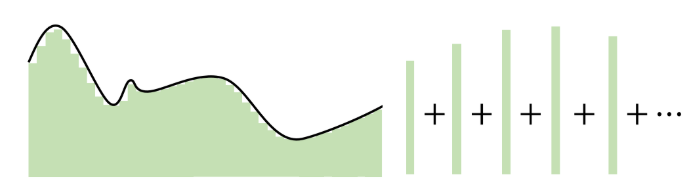



Высоту каждой ступеньки можно задавать по-разному. Чаще всего её определяют как значение функции в середине соответствующего отрезка:  
$$
b_i = f\left(\frac{a_i + a_{i+1}}{2}\right).
$$
Тогда всю функцию можно аппроксимировать суммой:  
$$f(x) \approx \sum_{i=1}^n f\left(\frac{a_i + a_{i+1}}{2}\right) \cdot [a_i \leq x < a_{i+1}].$$

Попробуем описать одну из таких ступенек с помощью нейронной сети. Пусть высота ступеньки равна $b_i$, а ширина — фиксирована и равна $h$. Тогда $a_{i+1} = a_i + h$.


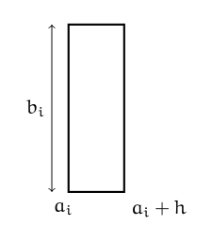


Если значение $x$, для которого мы ищем $f(x)$, попадает в полуинтервал, соответствующий ступеньке, будем аппроксимировать $f(x)$ её высотой. Ступенька состоит из двух границ, которые можно описать двумя условиями:  
$$a_i \leq x < a_i + h.$$
Чтобы проверить эти условия, пара нейронов должна сравнить $x$ с $a_i$ и $a_i + h$. Формально попадание $x$ в ступеньку можно записать так:  
$$1 - [x < a_i] - [x \geq a_i + h].$$  
Если оба условия одновременно не выполняются, результат равен 1, что соответствует попаданию в ступеньку. Если хотя бы одно из условий выполняется, результат становится равным 0, что означает выход за пределы ступеньки. Оба условия не могут выполняться одновременно.




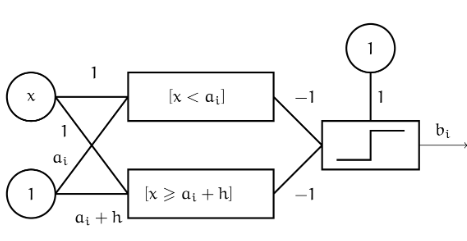

Теперь построим сетку. В качестве функции активации используем единичную ступеньку. Для каждой ступеньки создадим свою «сеть». Если $x$ попадает в конкретную ступеньку, её сеть на втором слое выдаст единичное значение. Это значение мы умножим на $b_i$ и передадим на внешний слой.

Поскольку $x$ может находиться только в одной ступеньке, на выходе сети лишь один слой выдаст значение 1, а все остальные — 0. Внешний слой просуммирует поступившие значения, и мы получим результат аппроксимации.

Чем больше ступенек мы добавляем в модель, тем точнее становится аппроксимация. Впоследствии можно оптимизировать архитектуру, убрав из неё дублирующиеся элементы.




##9. Подсчёт числа параметров в полносвязной нейронной сети

#### Постановка задачи
Необходимо определить общее число параметров (весов и смещений), которые требуется обучить в полносвязной нейронной сети, использующей следующую архитектуру:
- Входной слой с 12 переменными.
- Три скрытых слоя:
  - Первый слой содержит 300 нейронов.
  - Второй слой содержит 200 нейронов.
  - Третий слой содержит 100 нейронов.
- Выходной слой содержит один нейрон.



#### Расчёт числа параметров
Каждый полносвязный слой нейронной сети имеет параметры, состоящие из весов и смещений:
- **Веса.** Число весов определяется произведением числа нейронов в текущем слое на число входных переменных (нейронов предыдущего слоя).
- **Смещения.** Каждый нейрон имеет собственное смещение (bias), которое добавляется отдельно.

Для каждого слоя подсчитываем параметры следующим образом:
1. **Первый скрытый слой:**
   - Число входных переменных: $12$ (входной слой).
   - Число нейронов: $300$.
   - Общее число параметров:
$$
     (12 + 1) \cdot 300 = 3900.
$$

2. **Второй скрытый слой:**
   - Число входных переменных: $300$ (выходы из первого слоя).
   - Число нейронов: $200$.
   - Общее число параметров:
$$
     (300 + 1) \cdot 200 = 60200.
$$

3. **Третий скрытый слой:**
   - Число входных переменных: $200$ (выходы из второго слоя).
   - Число нейронов: $100$.
   - Общее число параметров:
$$
     (200 + 1) \cdot 100 = 20100.
$$

4. **Выходной слой:**
   - Число входных переменных: $100$ (выходы из третьего слоя).
   - Число нейронов: $1$.
   - Общее число параметров:
$$
     (100 + 1) \cdot 1 = 101.
$$



#### Итоговый подсчёт
Суммируем параметры всех слоёв:
$$
3900 + 60200 + 20100 + 101 = 84301.
$$


Таким оюразом, для обучения указанной полносвязной нейронной сети потребуется настроить **84,301 параметров**.


### Теоретическая оценка параметра линейной регрессии методом минимизации среднеквадратичной ошибки

Рассмотрим задачу обучения модели линейной регрессии вида $y = w \cdot x$ на основе двух наблюдений: $x_1 = 1$, $x_2 = 2$, $y_1 = 2$, $y_2 = 3$. В качестве функции потерь используется среднеквадратичная ошибка (MSE). Требуется найти теоретическую оценку неизвестного параметра $w$.

#### Постановка задачи:
1. Выписать функцию потерь (MSE) для заданных данных.
2. Найти производную функции потерь по параметру $w$.
3. Приравнять производную к нулю и решить уравнение относительно $w$.
4. Убедиться, что найденная точка является точкой минимума.



#### Решение:

1. **Функция потерь (MSE):**

   Для двух наблюдений среднеквадратичная ошибка вычисляется по формуле:
$$
   \text{MSE} = \frac{1}{2} \left( (y_1 - w \cdot x_1)^2 + (y_2 - w \cdot x_2)^2 \right).
$$
   Подставляя известные значения, получаем:
$$
   \text{MSE} = \frac{1}{2} \left( (2 - w \cdot 1)^2 + (3 - w \cdot 2)^2 \right).
$$
   Упрощая выражение, имеем:
$$
   \text{MSE} = \frac{1}{2} \left( (2 - w)^2 + (3 - 2w)^2 \right).
$$

2. **Производная функции потерь:**

   Для нахождения минимума функции потерь необходимо вычислить её производную по параметру $w$ и приравнять её к нулю:
$$
   \frac{d(\text{MSE})}{dw} = \frac{1}{2} \left( 2(2 - w)(-1) + 2(3 - 2w)(-2) \right).
$$
   Упрощая выражение, получаем:
$$
   \frac{d(\text{MSE})}{dw} = -(2 - w) - 2(3 - 2w).
$$
   Раскрывая скобки, находим:
$$
   \frac{d(\text{MSE})}{dw} = -2 + w - 6 + 4w = 5w - 8.
$$

3. **Нахождение оптимального значения параметра $w$:**

   Приравниваем производную к нулю:
$$
   5w - 8 = 0.
$$
   Решая уравнение, получаем:
$$
   w = \frac{8}{5} = 1.6.
$$

4. **Проверка на минимум:**

   Для подтверждения того, что найденная точка является точкой минимума, вычисляем вторую производную функции потерь:
$$
   \frac{d^2(\text{MSE})}{dw^2} = 5.
$$
   Поскольку вторая производная положительна ($5 > 0$), точка $w = 1.6$ действительно соответствует минимуму функции потерь.



#### Результат:
Теоретическая оценка параметра $w$, полученная методом минимизации среднеквадратичной ошибки, равна:
$$
w = 1.6.
$$






### Градиентный спуск для минимизации функции потерь

Рассмотрим задачу минимизации функции потерь $L(w) = \frac{1}{2} \sum_{i=1}^n (y_i - w x_i)^2$ с использованием градиентного спуска. В качестве начального значения параметра $w$ возьмём $w_0 = 0$, а скорость обучения $\eta = 0.1$. Требуется выполнить три шага градиентного спуска.



#### Решение:

1. **Градиент функции потерь:**

   Функция потерь для линейной регрессии с одним параметром $w$ имеет вид:
$$
   L(w) = \frac{1}{2} \sum_{i=1}^n (y_i - w x_i)^2.
$$
   Градиент функции потерь по параметру $w$ вычисляется как:
$$
   \nabla_w L(w) = \frac{\partial L}{\partial w} = -\sum_{i=1}^n x_i (y_i - w x_i).
$$
   Для двух наблюдений $(x_1 = 1, y_1 = 2)$ и $(x_2 = 2, y_2 = 3)$ градиент принимает вид:
$$
   \nabla_w L(w) = -\left( x_1 (y_1 - w x_1) + x_2 (y_2 - w x_2) \right).
$$

2. **Шаг 1: $w_0 = 0$**

   Вычислим градиент в точке $w_0 = 0$:
$$
   \nabla_w L(w_0) = -\left( 1 \cdot (2 - 0 \cdot 1) + 2 \cdot (3 - 0 \cdot 2) \right) = -\left( 2 + 6 \right) = -8.
$$
   Обновим параметр $w$ с учётом скорости обучения $\eta = 0.1$:
$$
   w_1 = w_0 - \eta \cdot \nabla_w L(w_0) = 0 - 0.1 \cdot (-8) = 0.8.
$$

3. **Шаг 2: $w_1 = 0.8$**

   Вычислим градиент в точке $w_1 = 0.8$:
$$
   \nabla_w L(w_1) = -\left( 1 \cdot (2 - 0.8 \cdot 1) + 2 \cdot (3 - 0.8 \cdot 2) \right) = -\left( 1.2 + 2 \cdot 1.4 \right) = -\left( 1.2 + 2.8 \right) = -4.
$$
   Обновим параметр $w$:
$$
   w_2 = w_1 - \eta \cdot \nabla_w L(w_1) = 0.8 - 0.1 \cdot (-4) = 0.8 + 0.4 = 1.2.
$$

4. **Шаг 3: $w_2 = 1.2$**

   Вычислим градиент в точке $w_2 = 1.2$:
$$
   \nabla_w L(w_2) = -\left( 1 \cdot (2 - 1.2 \cdot 1) + 2 \cdot (3 - 1.2 \cdot 2) \right) = -\left( 0.8 + 2 \cdot 0.6 \right) = -\left( 0.8 + 1.2 \right) = -2.
$$
   Обновим параметр $w$:
$$
   w_3 = w_2 - \eta \cdot \nabla_w L(w_2) = 1.2 - 0.1 \cdot (-2) = 1.2 + 0.2 = 1.4.
$$



#### Анализ результатов:

После трёх шагов градиентного спуска значение параметра $w$ приблизилось к теоретически оптимальному значению $w = 1.6$. На каждом шаге величина градиента уменьшается, что приводит к уменьшению размера шага. Это характерное поведение градиентного спуска при приближении к точке минимума.



#### Важные замечания:

1. **Скорость обучения $\eta$:**
   - Если скорость обучения $\eta$ слишком велика, процесс может "перепрыгнуть" точку минимума или начать колебаться вокруг неё.
   - Если $\eta$ слишком мала, сходимость будет медленной, и для достижения оптимума потребуется большое количество итераций.

2. **Сходимость:**
   - Градиентный спуск гарантированно сходится к глобальному минимуму для выпуклых функций, таких как MSE в линейной регрессии.
   - В данном случае процесс успешно приближается к оптимальному значению $w = 1.6$.



#### Итоговые значения параметра $w$ после трёх шагов:
$$
w_0 = 0, \quad w_1 = 0.8, \quad w_2 = 1.2, \quad w_3 = 1.4.
$$


### Стохастический градиентный спуск (SGD) для минимизации функции потерь

Рассмотрим применение стохастического градиентного спуска (SGD) для минимизации функции потерь $L(w) = \frac{1}{2} (y - w x)^2$. В отличие от обычного градиентного спуска, на каждой итерации SGD использует градиент, вычисленный только для одного наблюдения, что уменьшает вычислительную сложность. Начальное значение параметра $w_0 = 0$, скорость обучения $\eta = 0.1$. Наблюдения подаются в порядке: сначала $(x_1 = 1, y_1 = 2)$, затем $(x_2 = 2, y_2 = 3)$. Требуется выполнить четыре шага SGD.



#### Решение:

1. **Градиент функции потерь для одного наблюдения:**

   Для одного наблюдения $(x_i, y_i)$ градиент функции потерь $L(w) = \frac{1}{2} (y_i - w x_i)^2$ по параметру $w$ вычисляется как:
$$
   \nabla_w L(w) = \frac{\partial L}{\partial w} = -x_i (y_i - w x_i).
$$

2. **Шаг 1: Используем первое наблюдение $(x_1 = 1, y_1 = 2)$, $w_0 = 0$:**

   Вычислим градиент:
$$
   \nabla_w L(w_0) = -x_1 (y_1 - w_0 x_1) = -1 \cdot (2 - 0 \cdot 1) = -2.
$$
   Обновим параметр $w$:
$$
   w_1 = w_0 - \eta \cdot \nabla_w L(w_0) = 0 - 0.1 \cdot (-2) = 0.2.
$$

3. **Шаг 2: Используем второе наблюдение $(x_2 = 2, y_2 = 3)$, $w_1 = 0.2$:**

   Вычислим градиент:
$$
   \nabla_w L(w_1) = -x_2 (y_2 - w_1 x_2) = -2 \cdot (3 - 0.2 \cdot 2) = -2 \cdot 2.6 = -5.2.
$$
   Обновим параметр $w$:
$$
   w_2 = w_1 - \eta \cdot \nabla_w L(w_1) = 0.2 - 0.1 \cdot (-5.2) = 0.2 + 0.52 = 0.72.
$$

4. **Шаг 3: Используем первое наблюдение $(x_1 = 1, y_1 = 2)$, $w_2 = 0.72$:**

   Вычислим градиент:
$$
   \nabla_w L(w_2) = -x_1 (y_1 - w_2 x_1) = -1 \cdot (2 - 0.72 \cdot 1) = -1.28.
$$
   Обновим параметр $w$:
$$
   w_3 = w_2 - \eta \cdot \nabla_w L(w_2) = 0.72 - 0.1 \cdot (-1.28) = 0.72 + 0.128 = 0.848.
$$

5. **Шаг 4: Используем второе наблюдение $(x_2 = 2, y_2 = 3)$, $w_3 = 0.848$:**

   Вычислим градиент:
$$
   \nabla_w L(w_3) = -x_2 (y_2 - w_3 x_2) = -2 \cdot (3 - 0.848 \cdot 2) = -2 \cdot 1.304 = -2.608.
$$
   Обновим параметр $w$:
$$
   w_4 = w_3 - \eta \cdot \nabla_w L(w_3) = 0.848 - 0.1 \cdot (-2.608) = 0.848 + 0.2608 = 1.1088.
$$



#### Анализ результатов:

После четырёх шагов стохастического градиентного спуска значение параметра $w$ приблизилось к теоретически оптимальному значению $w = 1.6$. В отличие от обычного градиентного спуска, траектория SGD более шумная, так как на каждом шаге используется только одно наблюдение. Однако SGD часто сходится быстрее на больших datasets, так как требует меньше вычислений на каждой итерации.



#### Важные замечания:

1. **Скорость обучения $\eta$:**
   - В SGD выбор скорости обучения $\eta$ особенно важен, так как слишком большое значение может привести к неустойчивости, а слишком маленькое — к медленной сходимости.
   - В данном примере $\eta = 0.1$ обеспечивает устойчивую сходимость.

2. **Шум в траектории:**
   - Из-за использования одного наблюдения на каждом шаге траектория SGD более шумная, чем у обычного градиентного спуска.
   - На практике часто используют мини-батчи (несколько наблюдений на шаг), чтобы уменьшить шум.

3. **Сходимость:**
   - SGD сходится к оптимуму при условии, что скорость обучения $\eta$ уменьшается со временем (например, $\eta_t = \frac{\eta_0}{t}$).



#### Итоговые значения параметра $w$ после четырёх шагов SGD:
$$
w_0 = 0, \quad w_1 = 0.2, \quad w_2 = 0.72, \quad w_3 = 0.848, \quad w_4 = 1.1088.
$$

### Метод Momentum SGD для минимизации функции потерь

Метод Momentum SGD (стохастический градиентный спуск с инерцией) является модификацией стандартного SGD, которая учитывает накопленную информацию о градиенте на предыдущих шагах. Это позволяет ускорить сходимость и уменьшить колебания в процессе оптимизации. В данном случае используется параметр инерции $\alpha = 0.9$ и скорость обучения $\eta = 0.1$. Начальное значение параметра $w_0 = 0$, а начальная инерция $h_0 = 0$. Требуется выполнить два шага Momentum SGD.



#### Решение:

1. **Обновление параметров в Momentum SGD:**

   На каждом шаге обновление параметра $w$ и инерции $h$ происходит по следующим формулам:
$$
   h_t = \alpha \cdot h_{t-1} + \eta \cdot \nabla_w L(w_{t-1}),
$$
$$
   w_t = w_{t-1} - h_t.
$$
   Здесь:
   - $h_t$ — накопленная инерция на шаге $t$,
   - $\alpha$ — коэффициент инерции (обычно $\alpha \in [0, 1)$),
   - $\eta$ — скорость обучения,
   - $\nabla_w L(w_{t-1})$ — градиент функции потерь на шаге $t-1$.

2. **Шаг 1: $w_0 = 0$, $h_0 = 0$:**

   Вычислим градиент для первого наблюдения $(x_1 = 1, y_1 = 2)$:
$$
   \nabla_w L(w_0) = -x_1 (y_1 - w_0 x_1) = -1 \cdot (2 - 0 \cdot 1) = -2.
$$
   Обновим инерцию:
$$
   h_1 = \alpha \cdot h_0 + \eta \cdot \nabla_w L(w_0) = 0.9 \cdot 0 + 0.1 \cdot (-2) = -0.2.
$$
   Обновим параметр $w$:
$$
   w_1 = w_0 - h_1 = 0 - (-0.2) = 0.2.
$$

3. **Шаг 2: $w_1 = 0.2$, $h_1 = -0.2$:**

   Вычислим градиент для второго наблюдения $(x_2 = 2, y_2 = 3)$:
$$
   \nabla_w L(w_1) = -x_2 (y_2 - w_1 x_2) = -2 \cdot (3 - 0.2 \cdot 2) = -2 \cdot 2.6 = -5.2.
$$
   Обновим инерцию:
$$
   h_2 = \alpha \cdot h_1 + \eta \cdot \nabla_w L(w_1) = 0.9 \cdot (-0.2) + 0.1 \cdot (-5.2) = -0.18 - 0.52 = -0.7.
$$
   Обновим параметр $w$:
$$
   w_2 = w_1 - h_2 = 0.2 - (-0.7) = 0.9.
$$



#### Анализ результатов:

После двух шагов Momentum SGD значение параметра $w$ изменилось с $w_0 = 0$ до $w_2 = 0.9$. По сравнению с обычным SGD, метод Momentum SGD демонстрирует более быстрое движение в направлении оптимума благодаря учёту накопленной инерции. Однако из-за инерции параметр $w$ может "перелетать" точку оптимума, что приводит к колебаниям вокруг неё. На последующих шагах эти колебания будут уменьшаться, и процесс сойдётся к оптимальному значению $w = 1.6$.



#### Важные замечания:

1. **Роль инерции $\alpha$:**
   - Параметр $\alpha$ контролирует степень влияния предыдущих градиентов на текущий шаг. Чем больше $\alpha$, тем сильнее влияние инерции.
   - В данном примере $\alpha = 0.9$ обеспечивает значительное ускорение сходимости.

2. **Преимущества Momentum SGD:**
   - Уменьшает колебания в процессе оптимизации, особенно в областях с большим градиентом.
   - Ускоряет сходимость в направлениях с малым градиентом.

3. **Недостатки Momentum SGD:**
   - Из-за инерции процесс может "перелетать" точку оптимума, что требует аккуратного выбора скорости обучения $\eta$.



#### Итоговые значения параметра $w$ после двух шагов Momentum SGD:
$$
w_0 = 0, \quad w_1 = 0.2, \quad w_2 = 0.9.
$$


### Метод Momentum SGD с коррекцией Нестерова (Nesterov Accelerated Gradient, NAG)

Метод Momentum SGD с коррекцией Нестерова (Nesterov Accelerated Gradient, NAG) является улучшенной версией Momentum SGD. Основная идея заключается в том, чтобы учитывать инерцию на следующем шаге, что позволяет более точно корректировать направление движения. В данном случае используется параметр инерции $\alpha = 0.9$ и скорость обучения $\eta = 0.1$. Начальное значение параметра $w_0 = 0$, а начальная инерция $h_0 = 0$. Требуется выполнить два шага NAG.



#### Решение:

1. **Обновление параметров в NAG:**

   На каждом шаге обновление параметра $w$ и инерции $h$ происходит по следующим формулам:
$$
   h_t = \alpha \cdot h_{t-1} + \eta \cdot \nabla_w L(w_{t-1} - \alpha \cdot h_{t-1}),
$$
$$
   w_t = w_{t-1} - h_t.
$$
   Здесь:
   - $h_t$ — накопленная инерция на шаге $t$,
   - $\alpha$ — коэффициент инерции (обычно $\alpha \in [0, 1)$),
   - $\eta$ — скорость обучения,
   - $\nabla_w L(w_{t-1} - \alpha \cdot h_{t-1})$ — градиент функции потерь в точке, куда мы "смотрим" с учётом инерции.

2. **Шаг 1: $w_0 = 0$, $h_0 = 0$:**

   Вычислим градиент для первого наблюдения $(x_1 = 1, y_1 = 2)$:
$$
   \nabla_w L(w_0 - \alpha \cdot h_0) = \nabla_w L(0 - 0.9 \cdot 0) = \nabla_w L(0) = -x_1 (y_1 - w_0 x_1) = -1 \cdot (2 - 0 \cdot 1) = -2.
$$
   Обновим инерцию:
$$
   h_1 = \alpha \cdot h_0 + \eta \cdot \nabla_w L(w_0 - \alpha \cdot h_0) = 0.9 \cdot 0 + 0.1 \cdot (-2) = -0.2.
$$
   Обновим параметр $w$:
$$
   w_1 = w_0 - h_1 = 0 - (-0.2) = 0.2.
$$

3. **Шаг 2: $w_1 = 0.2$, $h_1 = -0.2$:**

   Вычислим градиент для второго наблюдения $(x_2 = 2, y_2 = 3)$ в точке $w_1 - \alpha \cdot h_1$:
$$
   w_{\text{lookahead}} = w_1 - \alpha \cdot h_1 = 0.2 - 0.9 \cdot (-0.2) = 0.2 + 0.18 = 0.38.
$$
   Градиент в этой точке:
$$
   \nabla_w L(w_{\text{lookahead}}) = -x_2 (y_2 - w_{\text{lookahead}} \cdot x_2) = -2 \cdot (3 - 0.38 \cdot 2) = -2 \cdot (3 - 0.76) = -2 \cdot 2.24 = -4.48.
$$
   Обновим инерцию:
$$
   h_2 = \alpha \cdot h_1 + \eta \cdot \nabla_w L(w_{\text{lookahead}}) = 0.9 \cdot (-0.2) + 0.1 \cdot (-4.48) = -0.18 - 0.448 = -0.628.
$$
   Обновим параметр $w$:
$$
   w_2 = w_1 - h_2 = 0.2 - (-0.628) = 0.2 + 0.628 = 0.828.
$$



#### Анализ результатов:

После двух шагов NAG значение параметра $w$ изменилось с $w_0 = 0$ до $w_2 = 0.828$. По сравнению с обычным Momentum SGD, метод NAG демонстрирует более аккуратное движение в направлении оптимума, так как учитывает инерцию на следующем шаге. Это позволяет избежать "перелёта" точки оптимума и ускоряет сходимость.



#### Важные замечания:

1. **Преимущества NAG:**
   - Более точное предсказание направления движения благодаря учёту инерции на следующем шаге.
   - Уменьшение колебаний вокруг точки оптимума по сравнению с Momentum SGD.

2. **Недостатки NAG:**
   - Вычислительная сложность немного выше, чем у Momentum SGD, так как требуется дополнительный расчёт градиента в "смотрящей" точке.

3. **Сравнение с Momentum SGD:**
   - На втором шаге Momentum SGD привёл к значению $w_2 = 0.9$, а NAG — к $w_2 = 0.828$. Это показывает, что NAG движется более аккуратно и ближе к оптимальному значению $w = 1.6$.



#### Итоговые значения параметра $w$ после двух шагов NAG:
$$
w_0 = 0, \quad w_1 = 0.2, \quad w_2 = 0.828.
$$


### Метод RMSprop для минимизации функции потерь

Метод RMSprop (Root Mean Square Propagation) является адаптивным методом оптимизации, который настраивает скорость обучения для каждого параметра индивидуально, основываясь на оценке второго момента градиента. Это позволяет эффективно работать в задачах с неравномерной геометрией функции потерь. В данном случае используется параметр $\alpha = 0.9$, скорость обучения $\eta = 0.1$, и начальное значение параметра $w_0 = 0$. Требуется выполнить два шага RMSprop.



#### Решение:

1. **Обновление параметров в RMSprop:**

   На каждом шаге обновление параметра $w$ и переменной $v$ (оценка второго момента градиента) происходит по следующим формулам:
$$
   v_t = \alpha \cdot v_{t-1} + (1 - \alpha) \cdot (\nabla_w L(w_{t-1}))^2,
$$
$$
   w_t = w_{t-1} - \frac{\eta}{\sqrt{v_t} + \epsilon} \cdot \nabla_w L(w_{t-1}).
$$
   Здесь:
   - $v_t$ — оценка второго момента градиента на шаге $t$,
   - $\alpha$ — коэффициент сглаживания (обычно $\alpha \in [0, 1)$),
   - $\eta$ — скорость обучения,
   - $\epsilon$ — малая константа для численной стабильности (обычно $\epsilon = 10^{-8}$),
   - $\nabla_w L(w_{t-1})$ — градиент функции потерь на шаге $t-1$.

2. **Шаг 1: $w_0 = 0$, $v_0 = 0$:**

   Вычислим градиент для первого наблюдения $(x_1 = 1, y_1 = 2)$:
$$
   \nabla_w L(w_0) = -x_1 (y_1 - w_0 x_1) = -1 \cdot (2 - 0 \cdot 1) = -2.
$$
   Обновим оценку второго момента:
$$
   v_1 = \alpha \cdot v_0 + (1 - \alpha) \cdot (\nabla_w L(w_0))^2 = 0.9 \cdot 0 + 0.1 \cdot (-2)^2 = 0.1 \cdot 4 = 0.4.
$$
   Обновим параметр $w$:
$$
   w_1 = w_0 - \frac{\eta}{\sqrt{v_1} + \epsilon} \cdot \nabla_w L(w_0) = 0 - \frac{0.1}{\sqrt{0.4} + 10^{-8}} \cdot (-2).
$$
   Упростим:
$$
   w_1 = 0 + \frac{0.1 \cdot 2}{0.632} \approx 0.316.
$$

3. **Шаг 2: $w_1 = 0.316$, $v_1 = 0.4$:**

   Вычислим градиент для второго наблюдения $(x_2 = 2, y_2 = 3)$:
$$
   \nabla_w L(w_1) = -x_2 (y_2 - w_1 x_2) = -2 \cdot (3 - 0.316 \cdot 2) = -2 \cdot (3 - 0.632) = -2 \cdot 2.368 = -4.736.
$$
   Обновим оценку второго момента:
$$
   v_2 = \alpha \cdot v_1 + (1 - \alpha) \cdot (\nabla_w L(w_1))^2 = 0.9 \cdot 0.4 + 0.1 \cdot (-4.736)^2 = 0.36 + 0.1 \cdot 22.43 \approx 0.36 + 2.243 = 2.603.
$$
   Обновим параметр $w$:
$$
   w_2 = w_1 - \frac{\eta}{\sqrt{v_2} + \epsilon} \cdot \nabla_w L(w_1) = 0.316 - \frac{0.1}{\sqrt{2.603} + 10^{-8}} \cdot (-4.736).
$$
   Упростим:
$$
   w_2 = 0.316 + \frac{0.1 \cdot 4.736}{1.613} \approx 0.316 + 0.293 \approx 0.609.
$$



#### Анализ результатов:

После двух шагов RMSprop значение параметра $w$ изменилось с $w_0 = 0$ до $w_2 \approx 0.609$. Метод RMSprop адаптивно настраивает скорость обучения для каждого параметра, что позволяет эффективно минимизировать функцию потерь даже в случаях с неравномерной геометрией.



#### Важные замечания:

1. **Адаптивная скорость обучения:**
   - RMSprop автоматически уменьшает скорость обучения для параметров с большим разбросом градиента и увеличивает её для параметров с малым разбросом.
   - Это особенно полезно в задачах с неравномерной геометрией функции потерь.

2. **Роль параметра $\alpha$:**
   - Параметр $\alpha$ контролирует степень сглаживания оценки второго момента градиента. Чем больше $\alpha$, тем больше учитываются прошлые значения градиента.

3. **Численная стабильность:**
   - Константа $\epsilon$ добавляется в знаменатель для предотвращения деления на ноль и обеспечения численной стабильности.

4. **Сравнение с другими методами:**
   - RMSprop демонстрирует более устойчивую сходимость по сравнению с Momentum SGD и NAG, особенно в задачах с большим количеством параметров.



#### Итоговые значения параметра $w$ после двух шагов RMSprop:
$$
w_0 = 0, \quad w_1 \approx 0.316, \quad w_2 \approx 0.609.
$$




### Метод Adam для минимизации функции потерь

Метод Adam (Adaptive Moment Estimation) сочетает в себе преимущества Momentum SGD и RMSprop. Он использует как инерцию (первый момент градиента), так и адаптивную скорость обучения (второй момент градиента). В данном случае используются параметры $\beta_1 = 0.9$, $\beta_2 = 0.9$, скорость обучения $\eta = 0.1$, и начальное значение параметра $w_0 = 0$. Требуется выполнить два шага Adam.



#### Решение:

1. **Обновление параметров в Adam:**

   На каждом шаге обновление параметра $w$, первого момента $h$ и второго момента $v$ происходит по следующим формулам:
$$
   h_t = \beta_1 \cdot h_{t-1} + (1 - \beta_1) \cdot \nabla_w L(w_{t-1}),
$$
$$
   v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot (\nabla_w L(w_{t-1}))^2,
$$
$$
   \hat{h}_t = \frac{h_t}{1 - \beta_1^t},
$$
$$
   \hat{v}_t = \frac{v_t}{1 - \beta_2^t},
$$
$$
   w_t = w_{t-1} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{h}_t.
$$
   Здесь:
   - $h_t$ — оценка первого момента градиента (инерция),
   - $v_t$ — оценка второго момента градиента,
   - $\beta_1, \beta_2$ — коэффициенты сглаживания для первого и второго моментов,
   - $\eta$ — скорость обучения,
   - $\epsilon$ — малая константа для численной стабильности (обычно $\epsilon = 10^{-8}$),
   - $\hat{h}_t, \hat{v}_t$ — скорректированные оценки моментов для устранения смещения.

2. **Шаг 1: $w_0 = 0$, $h_0 = 0$, $v_0 = 0$:**

   Вычислим градиент для первого наблюдения $(x_1 = 1, y_1 = 2)$:
$$
   \nabla_w L(w_0) = -x_1 (y_1 - w_0 x_1) = -1 \cdot (2 - 0 \cdot 1) = -2.
$$
   Обновим первый момент:
$$
   h_1 = \beta_1 \cdot h_0 + (1 - \beta_1) \cdot \nabla_w L(w_0) = 0.9 \cdot 0 + 0.1 \cdot (-2) = -0.2.
$$
   Обновим второй момент:
$$
   v_1 = \beta_2 \cdot v_0 + (1 - \beta_2) \cdot (\nabla_w L(w_0))^2 = 0.9 \cdot 0 + 0.1 \cdot (-2)^2 = 0.1 \cdot 4 = 0.4.
$$
   Скорректируем оценки моментов:
$$
   \hat{h}_1 = \frac{h_1}{1 - \beta_1^1} = \frac{-0.2}{1 - 0.9} = -2,
$$
$$
   \hat{v}_1 = \frac{v_1}{1 - \beta_2^1} = \frac{0.4}{1 - 0.9} = 4.
$$
   Обновим параметр $w$:
$$
   w_1 = w_0 - \frac{\eta}{\sqrt{\hat{v}_1} + \epsilon} \cdot \hat{h}_1 = 0 - \frac{0.1}{\sqrt{4} + 10^{-8}} \cdot (-2) = 0 + \frac{0.1 \cdot 2}{2} = 0.1.
$$

3. **Шаг 2: $w_1 = 0.1$, $h_1 = -0.2$, $v_1 = 0.4$:**

   Вычислим градиент для второго наблюдения $(x_2 = 2, y_2 = 3)$:
$$
   \nabla_w L(w_1) = -x_2 (y_2 - w_1 x_2) = -2 \cdot (3 - 0.1 \cdot 2) = -2 \cdot 2.8 = -5.6.
$$
   Обновим первый момент:
$$
   h_2 = \beta_1 \cdot h_1 + (1 - \beta_1) \cdot \nabla_w L(w_1) = 0.9 \cdot (-0.2) + 0.1 \cdot (-5.6) = -0.18 - 0.56 = -0.74.
$$
   Обновим второй момент:
$$
   v_2 = \beta_2 \cdot v_1 + (1 - \beta_2) \cdot (\nabla_w L(w_1))^2 = 0.9 \cdot 0.4 + 0.1 \cdot (-5.6)^2 = 0.36 + 0.1 \cdot 31.36 = 0.36 + 3.136 = 3.496.
$$
   Скорректируем оценки моментов:
$$
   \hat{h}_2 = \frac{h_2}{1 - \beta_1^2} = \frac{-0.74}{1 - 0.81} = \frac{-0.74}{0.19} \approx -3.895,
$$
$$
   \hat{v}_2 = \frac{v_2}{1 - \beta_2^2} = \frac{3.496}{1 - 0.81} = \frac{3.496}{0.19} \approx 18.4.
$$
   Обновим параметр $w$:
$$
   w_2 = w_1 - \frac{\eta}{\sqrt{\hat{v}_2} + \epsilon} \cdot \hat{h}_2 = 0.1 - \frac{0.1}{\sqrt{18.4} + 10^{-8}} \cdot (-3.895) \approx 0.1 + \frac{0.1 \cdot 3.895}{4.29} \approx 0.1 + 0.091 \approx 0.191.
$$



#### Анализ результатов:

После двух шагов Adam значение параметра $w$ изменилось с $w_0 = 0$ до $w_2 \approx 0.191$. Метод Adam эффективно сочетает инерцию и адаптивную скорость обучения, что позволяет ему быстро сходиться к оптимальному значению.



#### Важные замечания:

1. **Преимущества Adam:**
   - Adam сочетает в себе преимущества Momentum SGD (инерция) и RMSprop (адаптивная скорость обучения).
   - Он хорошо работает в задачах с неравномерной геометрией функции потерь и большим количеством параметров.

2. **Роль параметров $\beta_1$ и $\beta_2$:**
   - $\beta_1$ контролирует степень влияния прошлых градиентов на текущий момент (инерция).
   - $\beta_2$ контролирует степень влияния прошлых квадратов градиентов на текущую скорость обучения.

3. **Коррекция смещения:**
   - Коррекция смещения ($\hat{h}_t$ и $\hat{v}_t$) необходима для устранения смещения в оценках моментов на начальных шагах.

4. **Сравнение с другими методами:**
   - Adam демонстрирует более быструю сходимость по сравнению с Momentum SGD и RMSprop, особенно в задачах с большим количеством параметров.



#### Итоговые значения параметра $w$ после двух шагов Adam:
$$
w_0 = 0, \quad w_1 = 0.1, \quad w_2 \approx 0.191.
$$



### Метод AdaBelief: Коррекция скорости обучения на дисперсию

Метод AdaBelief является модификацией Adam, которая корректирует скорость обучения на основе дисперсии градиента, а не на его второй момент. Это позволяет более точно учитывать изменчивость градиента и улучшает сходимость.

#### Формулы для AdaBelief:

1. Оценка первого момента (инерция):
$$
   h_t = \beta_1 \cdot h_{t-1} + (1 - \beta_1) \cdot \nabla_w L(w_{t-1}).
$$

2. Оценка дисперсии градиента:
$$
   s_t = \beta_2 \cdot s_{t-1} + (1 - \beta_2) \cdot (\nabla_w L(w_{t-1}) - h_t)^2.
$$

3. Коррекция смещения:
$$
   \hat{h}_t = \frac{h_t}{1 - \beta_1^t},
$$
$$
   \hat{s}_t = \frac{s_t}{1 - \beta_2^t}.
$$

4. Обновление параметра:
$$
   w_t = w_{t-1} - \frac{\eta}{\sqrt{\hat{s}_t} + \epsilon} \cdot \hat{h}_t.
$$

#### Преимущества AdaBelief:
- Более точная оценка изменчивости градиента.
- Улучшенная сходимость в задачах с шумными градиентами.

На картинке ниже сравнивается сходимость разных градиентных спусков между собой. На ней нет Adam, но зато есть несколько других вариаций градиентного спуска, которые мы не разобрали в задачках выше. Они являются вариациями адаптивного градиентного спуска и почитать про них подробнее можно в статье, из которой взята анимация[1].


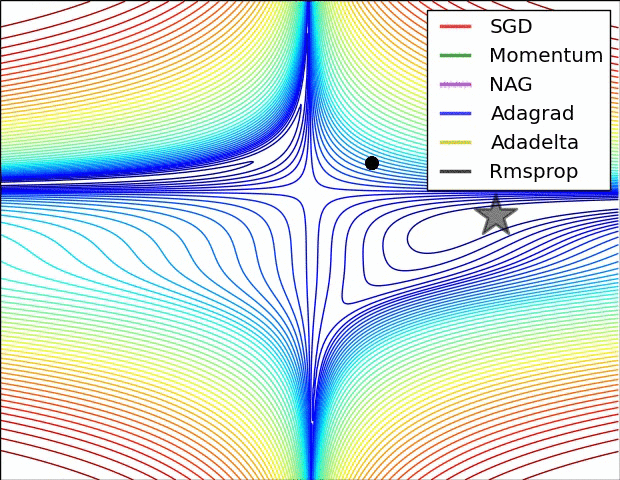



### Сравнение методов оптимизации

На графиках выше сравнивается сходимость различных методов оптимизации:
- **SGD**: Медленная сходимость, особенно в задачах с неравномерной геометрией.
- **Momentum SGD**: Быстрее SGD, но может "перелетать" точку оптимума из-за инерции.
- **NAG (Nesterov Accelerated Gradient)**: Более аккуратная сходимость по сравнению с Momentum SGD.
- **RMSprop**: Адаптивная скорость обучения, быстрая сходимость.
- **Adam**: Сочетает инерцию и адаптивную скорость обучения, часто является лучшим выбором.
- **AdaBelief**: Улучшенная версия Adam, корректирующая скорость обучения на дисперсию градиента.



1. https://ruder.io/optimizing-gradient-descent/